In [ ]:
#Install library SHAP
!pip install shap

import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#1. Load Data Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
#Preprocessing Cepat
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df = df.dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # 0=Pria, 1=Wanita
#Split X dan y
X = df.drop('Survived', axis=1)
y = df['Survived']
#Train Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

print("Model Random Forest siap!")

Model Random Forest siap!


In [ ]:
#1. Inisialisasi JavaScript
shap.initjs()
#2. Buat Explainer
explainer = shap.TreeExplainer(model)
#3. Hitung SHAP Values dari data X
shap_values = explainer.shap_values(X)
#Catatan: shap_values[1] artinya kita melihat penjelasan untuk kelas "Selamat" (1)

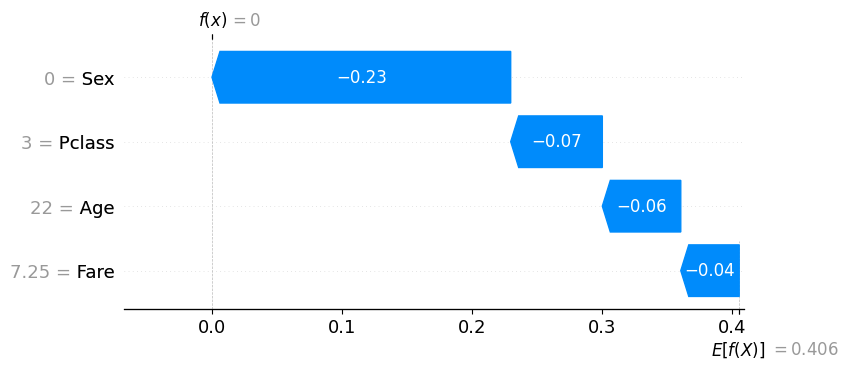

In [ ]:
#Tampilkan Waterfall Plot untuk penumpang pertama
#Grafik ini menunjukkan + dan - skor kontribusi setiap fitur
shap.plots.waterfall(shap.Explanation(values=shap_values[0, :, 1],
                                      base_values=explainer.expected_value[1],
                                      data=X.iloc[0],
                                      feature_names=X.columns))

Bentuk SHAP Values: (714, 4, 2)


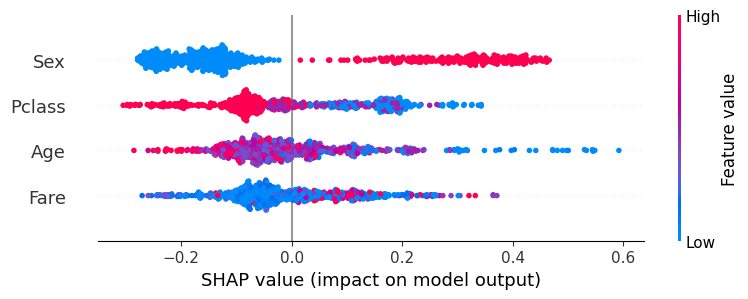

In [ ]:
#Cek dulu bentuk datanya
import numpy as np
print(f"Bentuk SHAP Values: {np.array(shap_values).shape}")

#Summary Plot
shap.summary_plot(shap_values[:, :, 1], X)